Итерация 1, значение цф = -0.952547, время = 0.0470 секунд
Итерация 2, значение цф = -0.952547, время = 0.0860 секунд
Итерация 3, значение цф = -0.952547, время = 0.1200 секунд
Итерация 4, значение цф = -0.952551, время = 0.1610 секунд
Итерация 5, значение цф = -0.952551, время = 0.1960 секунд
Итерация 6, значение цф = -0.952551, время = 0.2300 секунд
Итерация 7, значение цф = -0.952551, время = 0.2630 секунд
Итерация 8, значение цф = -0.952551, время = 0.3090 секунд
Итерация 9, значение цф = -0.952551, время = 0.3510 секунд
Итерация 10, значение цф = -0.952551, время = 0.3940 секунд
Итерация 11, значение цф = -0.952551, время = 0.4250 секунд
Итерация 12, значение цф = -0.952551, время = 0.4580 секунд
Итерация 13, значение цф = -0.952551, время = 0.5130 секунд
Итерация 14, значение цф = -0.952551, время = 0.5750 секунд
Итерация 15, значение цф = -0.952551, время = 0.6320 секунд
Итерация 16, значение цф = -0.952551, время = 0.6740 секунд
Итерация 17, значение цф = -0.952551, время = 0.7

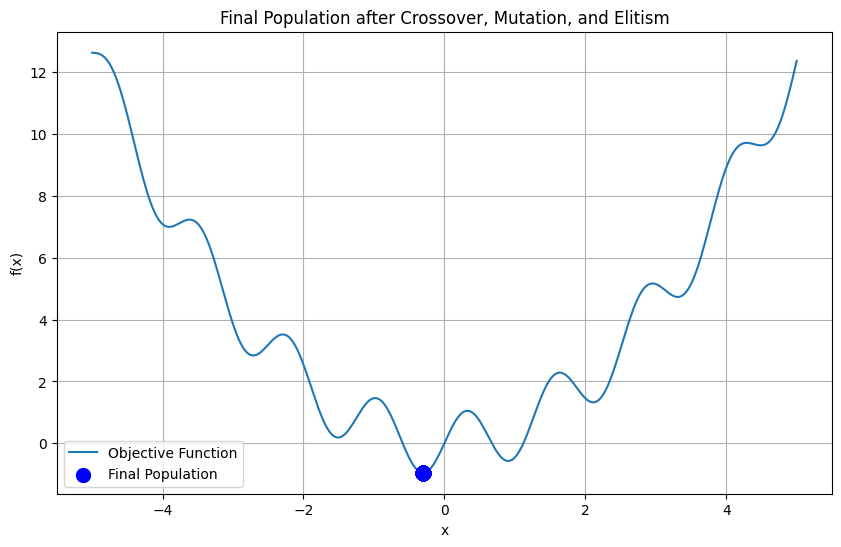

Финальная популяция: [[-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0.30206914]
 [-0

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import time
from pyDOE import lhs  # Библиотека для латинского гиперкуба

# Универсальная функция кэширования
def cache_function(func):
    cache = {}

    def cached_func(x):
        key = tuple(x) if isinstance(x, (list, np.ndarray)) else x
        
        # Если результат уже вычислен, возвращаем его
        if key in cache:
            return cache[key]
        
        # Иначе вычисляем результат и сохраняем его в кеш
        result = func(x)  # Вызываем переданную целевую функцию
        cache[key] = result
        return result
    
    return cached_func

# Пример целевой функции
def objective_function(x):
    return np.sum(np.sin(5 * x) + (x**2) / 2)  # Поддержка многомерности

# Кэшированная версия целевой функции
cached_objective_function = cache_function(objective_function)

# Инициализация популяции (выбор между случайной и латинским гиперкубом)
def initialize_population(pop_size, x_range, num_dimensions, method='random'):
    if method == 'random':
        # Случайное распределение для многомерной популяции
        return np.random.uniform(x_range[0], x_range[1], (pop_size, num_dimensions))
    elif method == 'lhs':  # Латинский гиперкуб
        lhs_samples = lhs(num_dimensions, samples=pop_size)  # num_dimensions измерений, pop_size выборок
        population = lhs_samples * (x_range[1] - x_range[0]) + x_range[0]  # Масштабируем выборки на нужный диапазон
        return population

# Селекция лучших индивидов с элитизмом (10% элиты)
def select_top_individuals_with_elitism(population, fitness_values, selection_percentage, elite_count=1):
    num_selected = int(len(population) * selection_percentage) - elite_count
    sorted_indices = np.argsort(fitness_values)
    elite_indices = sorted_indices[:elite_count]
    elite_population = population[elite_indices]
    elite_fitness = fitness_values[elite_indices]
    selected_indices = sorted_indices[elite_count:num_selected + elite_count]
    selected_population = population[selected_indices]
    selected_fitness = fitness_values[selected_indices]
    final_population = np.concatenate([elite_population, selected_population])
    final_fitness = np.concatenate([elite_fitness, selected_fitness])
    return final_population, final_fitness

# Скрещивание двух родителей
def crossover(parent1, parent2):
    return np.random.uniform(parent1, parent2)

# Создание потомков
def generate_offspring(selected_population, num_offspring):
    offspring = []
    for _ in range(num_offspring):
        parents = np.random.choice(len(selected_population), 2, replace=False)
        child = crossover(selected_population[parents[0]], selected_population[parents[1]])
        offspring.append(child)
    return np.array(offspring)

# Мутация потомков
def mutate(offspring, mutation_rate, mutation_strength, x_range):
    num_to_mutate = int(len(offspring) * mutation_rate)
    indices_to_mutate = np.random.choice(len(offspring), num_to_mutate, replace=False)
    for i in indices_to_mutate:
        mutation = np.random.uniform(-mutation_strength, mutation_strength, offspring.shape[1]) * (x_range[1] - x_range[0])
        offspring[i] += mutation
        offspring[i] = np.clip(offspring[i], x_range[0], x_range[1])  # Ограничиваем диапазон
    return offspring

# Гиперпараметры
population_size = 500
x_range = (-5, 5)
num_dimensions = 1  # Количество переменных (размерность)
selection_percentage = 0.5  # 50% популяции
offspring_ratio = 2.0  # Потомки в 2 раза больше родителей
mutation_rate = 0.3  # 30% потомков подвергаются мутации
mutation_strength = 0.1  # Сила мутации (10% диапазона)
elite_fraction = 0.1  # 10% элитизма (1 особь)
num_iterations = 500  # Число итераций (гиперпараметр)
initialization_method = 'random'  # Способ инициализации: 'random' или 'lhs'
early_stopping_patience = 500  # Число итераций без улучшений до остановки

# Шаги
population = initialize_population(population_size, x_range, num_dimensions, method=initialization_method)
fitness_values = np.array([cached_objective_function(ind) for ind in population])

# Основной цикл
best_solution = None
best_fitness = float('inf')
no_improvement_count = 0  # Счётчик итераций без улучшений

# Начало общего таймера для всех итераций
global_start_time = time.time()

for generation in range(num_iterations):
    start_time = time.time()  # Засекаем время начала итерации
    
    # Отбор лучших 50% индивидов с элитизмом
    selected_population, selected_fitness = select_top_individuals_with_elitism(population, fitness_values, selection_percentage, elite_count=int(elite_fraction * population_size))
    
    # Количество потомков
    num_offspring = int(len(selected_population) * offspring_ratio)
    offspring = generate_offspring(selected_population, num_offspring)

    # Мутация
    offspring = mutate(offspring, mutation_rate, mutation_strength, x_range)

    # Объединение родителей и потомков
    combined_population = np.concatenate([selected_population, offspring])
    combined_fitness = np.array([cached_objective_function(ind) for ind in combined_population])

    # Отбор лучших особей
    final_population, final_fitness = select_top_individuals_with_elitism(combined_population, combined_fitness, population_size / len(combined_population), elite_count=int(elite_fraction * population_size))

    # Обновляем популяцию
    population = final_population
    fitness_values = final_fitness

    # Находим лучшее решение
    current_best_fitness = np.min(final_fitness)
    current_best_solution = final_population[np.argmin(final_fitness)]
    
    if current_best_fitness < best_fitness:
        best_fitness = current_best_fitness
        best_solution = current_best_solution
        no_improvement_count = 0  # Сброс счётчика при улучшении
    else:
        no_improvement_count += 1  # Увеличиваем счётчик если нет улучшения

    # Время итерации и общее время с начала всего процесса
    iteration_time = time.time() - global_start_time

    # Вывод результатов итерации
    print(f"Итерация {generation+1}, значение цф = {best_fitness:.6f}, время = {iteration_time:.4f} секунд")

    # Early stopping: Если нет улучшений за последние 10 итераций, останавливаем алгоритм
    if no_improvement_count >= early_stopping_patience:
        print(f"Early stopping на {generation+1} итерации. Нет улучшений за {early_stopping_patience} итераций.")
        break

# Визуализация финальной популяции
if num_dimensions == 1:
    x_vals = np.linspace(x_range[0], x_range[1], 400)
    y_vals = np.array([cached_objective_function(x) for x in x_vals])  # Применяем функцию ко всему массиву

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Objective Function')
    plt.scatter(final_population, final_fitness, color='blue', zorder=10, label='Final Population', s=100)
    plt.title('Final Population after Crossover, Mutation, and Elitism')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Вывод финальной популяции и её значения целевой функции
print(f"Финальная популяция: {final_population}")
print(f"Значения целевой функции для финальной популяции: {final_fitness}")
